In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import sequence
from keras.datasets import imdb

In [3]:
#處理IMDB資料
max_features = 10000 #考慮作為特徵的文字數量
maxlen = 500 #只看每篇評論的前500個字

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
#訓練雙向LSTM進行IMDB預測
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

2022-08-26 03:24:10.423963: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

2022-08-26 03:24:18.167143: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
157/157 [==============================] - 117s 720ms/step - loss: 0.5260 - acc: 0.7477 - val_loss: 0.4108 - val_acc: 0.8314
Epoch 2/10
157/157 [==============================] - 109s 695ms/step - loss: 0.3095 - acc: 0.8809 - val_loss: 0.3003 - val_acc: 0.8822
Epoch 3/10
157/157 [==============================] - 109s 696ms/step - loss: 0.2464 - acc: 0.9082 - val_loss: 0.2971 - val_acc: 0.8776
Epoch 4/10
157/157 [==============================] - 109s 692ms/step - loss: 0.2055 - acc: 0.9244 - val_loss: 0.4046 - val_acc: 0.8674
Epoch 5/10
157/157 [==============================] - 109s 697ms/step - loss: 0.1834 - acc: 0.9332 - val_loss: 0.2982 - val_acc: 0.8832
Epoch 6/10
157/157 [==============================] - 111s 705ms/step - loss: 0.1641 - acc: 0.9433 - val_loss: 0.4607 - val_acc: 0.8528
Epoch 7/10
157/157 [==============================] - 111s 705ms/step - loss: 0.1517 - acc: 0.9481 - val_loss: 0.3088 - val_acc: 0.8722
Epoch 8/10
157/157 [============================

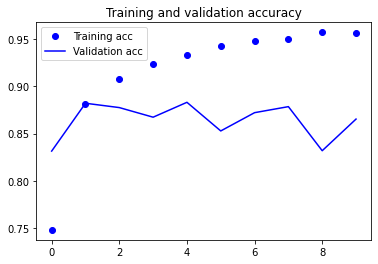

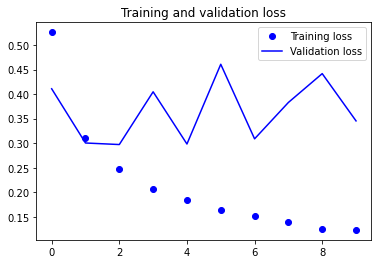

In [11]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
#自然語言處理: 循環聚焦(recurrent attention) 、 序列遮罩(sequence masking)